In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library to load Dataset
import pickle
#Library to save the models using Joblib
from sklearn.externals import joblib 
#To measure the accuracy
from sklearn.metrics import accuracy_score
#Library to perform PCA
from sklearn.decomposition import PCA
#Library to perform tsne
from sklearn.manifold import TSNE
#Library for SVM - Support Vector Machine
from sklearn import svm 
#Library to perform Grid Search CV
from sklearn.model_selection import GridSearchCV 
#Library to measure time
import time
#Library to perform rgb to gray and hsv
import cv2 

In [ ]:
with open('/content/data_batch_1', mode='rb') as file:
  data_1 = pickle.load(file, encoding='bytes')
  print(data_1)
with open('/content/data_batch_2', mode='rb') as file:
  data_2 = pickle.load(file, encoding='bytes')
  print(data_2)
with open('/content/data_batch_3', mode='rb') as file:
  data_3 = pickle.load(file, encoding='bytes')
  print(data_3)
with open('/content/data_batch_4', mode='rb') as file:
  data_4 = pickle.load(file, encoding='bytes')
  print(data_4)
with open('/content/data_batch_5', mode='rb') as file:
  data_5 = pickle.load(file, encoding='bytes')
  print(data_5)
with open('/content/test_batch', mode='rb') as file:
  data_6 = pickle.load(file, encoding='bytes')
  print(data_6)
with open('/content/batches.meta', mode='rb') as file:
  data_7 = pickle.load(file, encoding='bytes')
  print(data_7)


{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [ ]:
#Printing the shape of the data
print(data_1[b'data'].shape)


(10000, 3072)


In [ ]:
#Printing the type and the keys of the data
print(type(data_1))
print(data_1.keys())

<class 'dict'>
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
#Combining the train data and test data
train_data = np.concatenate((data_1[b'data'],data_2[b'data'],data_3[b'data']))
train1 = np.concatenate((data_4[b'data'],data_5[b'data']))
train_data = np.concatenate((train_data,train1))
print(train_data)
train_labels = np.concatenate((data_1[b'labels'],data_2[b'labels'],data_3[b'labels']))
train2 = np.concatenate((data_4[b'labels'],data_5[b'labels']))
train_labels = np.concatenate((train_labels,train2))
print(train_labels)
test_data = data_6[b'data']
print(test_data)
test_labels = data_6[b'labels']
print(test_labels)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]
[6 9 9 ... 9 1 1]
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 

In [ ]:
#Printing the shape of the newly formed train and test data
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels = np.asarray(test_labels)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [ ]:
#Reshaping the data from 50000*3072 to 50000*32*32*3
train_data1 = train_data.reshape((len(train_data), 32, 32,3))
test_data1 = test_data.reshape((len(test_data), 32, 32,3))

In [ ]:
#Printing the maximum and minimum values of the test dataset
print(train_data.max(),train_data.min())

255 0


(32, 32, 3)


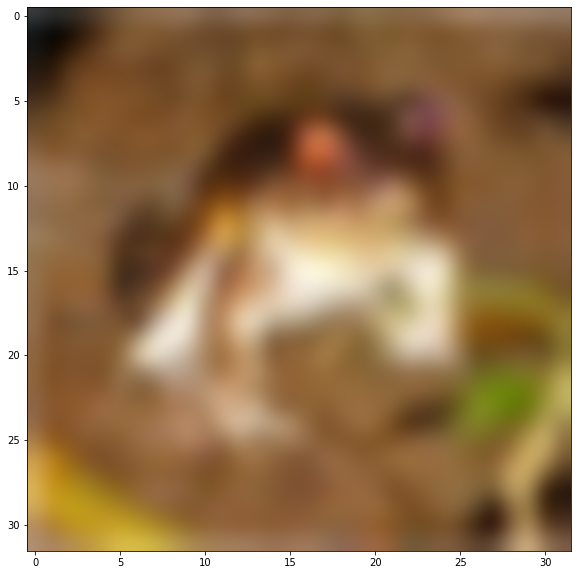

In [ ]:
#Printing one RGB Image
ind = 0
arr = train_data[ind] 
#print(train_data1)
R = arr[0:1024].reshape(32,32)/255.0 
G = arr[1024:2048].reshape(32,32)/255.0 
B = arr[2048:].reshape(32,32)/255.0 
img = np.dstack((R,G,B)) 
print(img.shape)
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111) 
ax.imshow(img,interpolation='bicubic')

In [ ]:
#Converting RGB to Gray train data
gray_data = np.array([cv2.cvtColor(train_data1[i], cv2.COLOR_BGR2GRAY) for i in range(train_data1.shape[0])])
print(gray_data)
print(gray_data.shape)

[[[ 47 101 146 ... 126 137 116]
  [ 52 115 107 ... 136 103  38]
  [113 134 123 ... 112 129 127]
  ...
  [ 47  67  64 ...  59  40  94]
  [ 32  43  56 ...  62  63  18]
  [ 39  33  50 ...  62  70  87]]

 [[123 131 168 ...  99  83  69]
  [132 158 207 ...  85  90  82]
  [116  86  75 ... 112  64  76]
  ...
  [ 83  51  50 ... 105  31  68]
  [154 156 130 ... 111  64  81]
  [164 167 182 ...  74 133 142]]

 [[253 253 253 ... 254 254 254]
  [255 255 255 ... 254 255 255]
  [255 255 255 ... 239 253 250]
  ...
  [107  64  46 ...  73  76  89]
  [ 79  82  77 ...  71  73  83]
  [110  92  88 ...  77  73  83]]

 ...

 [[ 40  43  51 ... 196 241 110]
  [102  81  89 ... 212 175  15]
  [178 167 175 ... 172 119  13]
  ...
  [ 11  12  36 ...  77  46  17]
  [ 33  78  97 ... 101  78  55]
  [ 73  99  97 ... 103  92  62]]

 [[186 182 180 ... 189 177 171]
  [225 222 219 ... 233 223 209]
  [218 214 220 ... 236 230 221]
  ...
  [132 226 166 ... 185 150  98]
  [187  80 128 ... 108  42 156]
  [175  18  41 ... 170 168 1

In [ ]:
#Converting RGB to Gray_data test data
gray_data_test = np.array([cv2.cvtColor(test_data1[i], cv2.COLOR_BGR2GRAY) for i in range(test_data1.shape[0])])
print(gray_data_test)
print(gray_data_test.shape)

[[[161 159 159 ... 124 141 128]
  [156 168 168 ...  96  78 137]
  [ 93 151 169 ...  84  53 127]
  ...
  [170 186 230 ... 149 150 170]
  [144 137 217 ... 136 171 117]
  [148 138 125 ... 149 167 123]]

 [[232 232 232 ... 234 234 235]
  [235 235 235 ... 235 236 237]
  [229 235 236 ... 225 230 237]
  ...
  [ 26  77  34 ...  75 127 179]
  [ 20   2   5 ... 115 140 190]
  [ 35   3   2 ... 125 155 192]]

 [[152 167 194 ... 241 244 246]
  [173 187 210 ... 239 235 239]
  [186 188 219 ...  90 178 198]
  ...
  [149 161 103 ...  74  51  47]
  [101  91  81 ...  49  50  34]
  [ 43  44  49 ...  44  46   5]]

 ...

 [[ 18  14  11 ...  11  12  12]
  [ 22  23  22 ...  16  13  16]
  [ 25  28  28 ... 135  23  20]
  ...
  [ 15  15  32 ... 152  45  53]
  [ 15  15  41 ... 116  54  54]
  [ 15  14 117 ...  68  52  51]]

 [[ 19  31  96 ...  63 126 144]
  [ 20 148 189 ...  43  84  94]
  [  8   9 151 ...  47  34  18]
  ...
  [ 65  64  62 ...  74  76  68]
  [ 67  67  71 ...  77  72  78]
  [ 84  84  83 ...  83  78  

In [ ]:
#Converting RGB to HSV train data
hsv_data = np.array([cv2.cvtColor(train_data1[i], cv2.COLOR_BGR2HSV) for i in range(train_data1.shape[0])])
print(hsv_data)
print(hsv_data.shape)

[[[[133  69  59]
   [ 18 109 119]
   [ 18  17 149]
   ...
   [150   2 127]
   [ 60  22 142]
   [ 85  23 120]]

  [[  3 158  87]
   [ 25  24 117]
   [127  20 114]
   ...
   [ 35  40 140]
   [102  68 120]
   [117 133  67]]

  [[ 16  54 123]
   [ 50  11 136]
   [175  12 127]
   ...
   [ 16 111 135]
   [113  15 135]
   [ 12  29 134]]

  ...

  [[118 106  72]
   [ 42  71  72]
   [179  76  81]
   ...
   [ 99  54  66]
   [  0  29  44]
   [ 76 125 114]]

  [[119 177  82]
   [ 14  78  49]
   [ 18  22  58]
   ...
   [ 14  49  68]
   [173 135  98]
   [120 229  87]]

  [[117 186  96]
   [ 39  53  34]
   [ 39  49  52]
   ...
   [ 56  27  65]
   [  6 142 104]
   [115 124 140]]]


 [[[107  81 154]
   [ 13  87 155]
   [ 84  54 180]
   ...
   [ 48  37 103]
   [ 22  71  90]
   [118  39  79]]

  [[ 88  28 137]
   [ 12  69 181]
   [ 30   6 208]
   ...
   [ 99  39  92]
   [ 75  57  98]
   [ 18  67  91]]

  [[101 101 146]
   [ 70   9  87]
   [ 80  29  78]
   ...
   [111 121 169]
   [110  85  84]
   [ 98  72

In [ ]:
#Converting RGB to HSV test data
hsv_data_test = np.array([cv2.cvtColor(test_data1[i], cv2.COLOR_BGR2HSV) for i in range(test_data1.shape[0])])
print(hsv_data_test)
print(hsv_data_test.shape)

[[[[  4  11 165]
   [108  15 166]
   [113   6 162]
   ...
   [  9  38 134]
   [140   5 143]
   [104  35 139]]

  [[  0   8 160]
   [120  10 174]
   [ 90   6 169]
   ...
   [ 71  21  99]
   [  5 118 108]
   [100  11 140]]

  [[ 97 161 127]
   [ 24 123 170]
   [ 45   3 170]
   ...
   [143  12  87]
   [105 111  71]
   [ 28 117 137]]

  ...

  [[ 19  72 188]
   [ 83  24 192]
   [ 28  81 241]
   ...
   [ 26  23 152]
   [  9  12 154]
   [ 15  42 182]]

  [[105  54 165]
   [  3  65 164]
   [ 86  97 247]
   ...
   [170   6 138]
   [ 46  39 178]
   [147  67 140]]

  [[112  58 177]
   [105  24 146]
   [ 59  38 133]
   ...
   [ 15  67 167]
   [ 96  52 182]
   [ 82  38 129]]]


 [[[128   4 235]
   [  0   0 232]
   [  0   0 232]
   ...
   [  0   0 234]
   [  0   0 234]
   [ 90   1 235]]

  [[120   3 238]
   [  0   0 235]
   [ 90   1 235]
   ...
   [ 30  11 236]
   [  0   0 236]
   [  0   0 237]]

  [[  0   4 232]
   [ 15   6 237]
   [150   1 237]
   ...
   [ 21  11 228]
   [ 30   2 230]
   [ 20   3

### **Question 1a - HOG**

**HOG for train data**

In [ ]:
#Creating a Dataframe for HOG on train data
feat_cols = []
for i in range(1,343):
  feat_cols.append('value' + str(i))
print(feat_cols)
feat_cols.append('label')
Qhog = pd.DataFrame(columns = feat_cols)
Qhog = Qhog.astype({"label":int})
print(Qhog.dtypes)
print(Qhog)

['value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9', 'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17', 'value18', 'value19', 'value20', 'value21', 'value22', 'value23', 'value24', 'value25', 'value26', 'value27', 'value28', 'value29', 'value30', 'value31', 'value32', 'value33', 'value34', 'value35', 'value36', 'value37', 'value38', 'value39', 'value40', 'value41', 'value42', 'value43', 'value44', 'value45', 'value46', 'value47', 'value48', 'value49', 'value50', 'value51', 'value52', 'value53', 'value54', 'value55', 'value56', 'value57', 'value58', 'value59', 'value60', 'value61', 'value62', 'value63', 'value64', 'value65', 'value66', 'value67', 'value68', 'value69', 'value70', 'value71', 'value72', 'value73', 'value74', 'value75', 'value76', 'value77', 'value78', 'value79', 'value80', 'value81', 'value82', 'value83', 'value84', 'value85', 'value86', 'value87', 'value88', 'value89', 'value90', 'value91', 'value9

In [ ]:
def Question1a_hog_train(train_data, gray_data, hsv_data, train_labels,Qhog):
  #For measuring the time
  start = time.time()
  #Iterating over the train data
  for img in range(train_data.shape[0]):
    #Calculating the magnitude and direction matrix
    g_mag = np.zeros((32,32))
    g_dir = np.zeros((32,32))
    g_x = np.array(gray_data[img])
    change1 = [0]*32
    g_x = np.vstack ((g_x, change1) )
    change2 = [0]*33
    g_x = np.column_stack((g_x, change2))
    g_x = np.column_stack((change2 , g_x))
    change3 = [0]*34
    g_x = np.vstack((change3 , g_x) )
    for k in range(1,33):
      for m in range(1, 33):
        y = g_x[k-1][m] - g_x[k+1][m]
        x = g_x[k][m-1] - g_x[k][m+1]
        mag1 = (x**2 + y**2)
        mag = mag1 ** 0.5
        if x != 0:
          dir = (np.math.degrees(np.math.atan(y/x)))
          dir = dir%180
        else:
          dir = 90
        g_mag[k-1][m-1] = mag
        g_dir[k-1][m-1] = dir
    final_list = []
    #Calcuating the values of bins for 16 blocks
    for i in range(0,32,8):
      for j in range(0,32,8):
        l = [0.0]*9
        grmag = np.array(g_mag[i:i+8,j:j+8])
        grdir = np.array(g_dir[i:i+8,j:j+8])
        for k in range(0, 8):
          for m in range(0, 8):
            val = (int(grdir[k][m]/20))%9
            v_1 = ((20*(val+1) - grdir[k][m])/20)*grmag[k][m]
            l[val] = l[val] + v_1
            v_2 = ((grdir[k][m] - (20*val))/20)*grmag[k][m]
            val1 = (val+1)%9
            l[val1] = l[val1] + v_2
        final_list.append(l)
    #Sliding iteration for features and normalisation over a block of 16*16
    features = []
    for l in range(0,3):
      for k in range(0,3):
        val = l*4 + k
        feat = []
        feat = final_list[val]
        feat.extend(final_list[val+1])
        feat.extend(final_list[val+4])
        feat.extend(final_list[val+1+4])
        sq_sum = sum(map(lambda i : i * i, feat))
        k_val = sq_sum**0.5
        normalise = [val / k_val for val in feat]
        features.extend(normalise)
    #Calculating the color histogram with 18 bins
    h_x = np.array(hsv_data[img,:,:,0])
    bins_val = 180/10
    bins = [0]*18
    for i in range(h_x.shape[0]):
      for j in range(h_x.shape[1]):
        value = int(h_x[i][j]/10)
        bins[value] += 1
    sq_sum1 = sum(map(lambda i : i * i, bins))
    k_val1 = sq_sum1**0.5
    normalise1 = [val / k_val1 for val in bins]
    features.extend(normalise1)
    features.append(train_labels[img])
    df_length = len(Qhog)
    Qhog.loc[df_length] = features
  Qhog = Qhog.astype({"label":int})
  print(Qhog)
  end = time.time()
  print(f"Runtime of the program is {end - start}")
  return Qhog

Qhog = Question1a_hog_train(train_data, gray_data, hsv_data, train_labels,Qhog)

         value1    value2    value3  ...  value341  value342  label
0      0.145355  0.202652  0.229040  ...  0.122889  0.169876      6
1      0.156926  0.036866  0.176026  ...  0.123136  0.137208      9
2      0.219005  0.057716  0.098918  ...  0.069847  0.112362      9
3      0.221201  0.266845  0.112266  ...  0.167497  0.186973      4
4      0.043961  0.056895  0.070923  ...  0.082105  0.133421      1
...         ...       ...       ...  ...       ...       ...    ...
49995  0.216435  0.029827  0.059234  ...  0.098791  0.128429      2
49996  0.197076  0.114963  0.159097  ...  0.071555  0.097576      6
49997  0.112303  0.078955  0.058243  ...  0.072799  0.194131      9
49998  0.193264  0.051373  0.041776  ...  0.084147  0.110039      1
49999  0.185224  0.075420  0.131822  ...  0.122174  0.128961      1

[50000 rows x 343 columns]
Runtime of the program is 1828.1275055408478


**Finding the Xtrain and Ytrain**

In [ ]:
X_train = Qhog.iloc[:,:-1]
Y_train = Qhog.iloc[:,-1]
print(X_train,Y_train)

         value1    value2    value3  ...  value340  value341  value342
0      0.145355  0.202652  0.229040  ...  0.075902  0.122889  0.169876
1      0.156926  0.036866  0.176026  ...  0.105545  0.123136  0.137208
2      0.219005  0.057716  0.098918  ...  0.066810  0.069847  0.112362
3      0.221201  0.266845  0.112266  ...  0.186973  0.167497  0.186973
4      0.043961  0.056895  0.070923  ...  0.065000  0.082105  0.133421
...         ...       ...       ...  ...       ...       ...       ...
49995  0.216435  0.029827  0.059234  ...  0.088912  0.098791  0.128429
49996  0.197076  0.114963  0.159097  ...  0.074808  0.071555  0.097576
49997  0.112303  0.078955  0.058243  ...  0.058933  0.072799  0.194131
49998  0.193264  0.051373  0.041776  ...  0.093857  0.084147  0.110039
49999  0.185224  0.075420  0.131822  ...  0.101811  0.122174  0.128961

[50000 rows x 342 columns] 0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1

**HOG for test data**

In [ ]:
#Creating a dataframe for the test data HOG
feat_cols1 = []
for i in range(1,343):
  feat_cols1.append('value' + str(i))
print(feat_cols1)
feat_cols1.append('label')
Qhog_test = pd.DataFrame(columns = feat_cols1)
Qhog_test = Qhog_test.astype({"label":int})
print(Qhog_test.dtypes)

['value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9', 'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17', 'value18', 'value19', 'value20', 'value21', 'value22', 'value23', 'value24', 'value25', 'value26', 'value27', 'value28', 'value29', 'value30', 'value31', 'value32', 'value33', 'value34', 'value35', 'value36', 'value37', 'value38', 'value39', 'value40', 'value41', 'value42', 'value43', 'value44', 'value45', 'value46', 'value47', 'value48', 'value49', 'value50', 'value51', 'value52', 'value53', 'value54', 'value55', 'value56', 'value57', 'value58', 'value59', 'value60', 'value61', 'value62', 'value63', 'value64', 'value65', 'value66', 'value67', 'value68', 'value69', 'value70', 'value71', 'value72', 'value73', 'value74', 'value75', 'value76', 'value77', 'value78', 'value79', 'value80', 'value81', 'value82', 'value83', 'value84', 'value85', 'value86', 'value87', 'value88', 'value89', 'value90', 'value91', 'value9

In [ ]:
def Question1a_hog_test(test_data, gray_data_test, hsv_data_test, test_labels,Qhog_test):
  for img in range(test_data.shape[0]):
    print(img)
    #Calculating the magnitue and direction matrix
    g_mag = np.zeros((32,32))
    g_dir = np.zeros((32,32))
    g_x = np.array(gray_data_test[img])
    change1 = [0]*32
    g_x = np.vstack ((g_x, change1) )
    change2 = [0]*33
    g_x = np.column_stack((g_x, change2))
    g_x = np.column_stack((change2 , g_x))
    change3 = [0]*34
    g_x = np.vstack((change3 , g_x) )
    for k in range(1, 33):
      for m in range(1, 33):
        y = g_x[k-1][m] - g_x[k+1][m]
        x = g_x[k][m-1] - g_x[k][m+1]
        mag1 = (x**2 + y**2)
        mag = mag1 ** 0.5
        if x != 0:
          dir = (np.math.degrees(np.math.atan(y/x)))
          dir = dir%180
        else:
          dir = 90
        g_mag[k-1][m-1] = mag
        g_dir[k-1][m-1] = dir
    final_list = []
    #Iterating over 16 blocks and normalising the values
    for i in range(0,32,8):
      for j in range(0,32,8):
        l = [0.0]*9
        grmag = np.array(g_mag[i:i+8,j:j+8])
        grdir = np.array(g_dir[i:i+8,j:j+8])
        for k in range(0, 8):
          for m in range(0, 8):
            val = (int(grdir[k][m]/20))%9
            v_1 = ((20*(val+1) - grdir[k][m])/20)*grmag[k][m]
            l[val] = l[val] + v_1
            v_2 = ((grdir[k][m] - (20*val))/20)*grmag[k][m]
            val1 = (val+1)%9
            l[val1] = l[val1] + v_2
        final_list.append(l)
    features = []
    #Iterating over sliding over 16 cells
    for l in range(0,3):
      for k in range(0,3):
        val = l*4 + k
        feat = []
        feat = final_list[val]
        feat.extend(final_list[val+1])
        feat.extend(final_list[val+4])
        feat.extend(final_list[val+1+4])
        sq_sum = sum(map(lambda i : i * i, feat))
        k_val = sq_sum**0.5
        normalise = [val / k_val for val in feat]
        features.extend(normalise)
    #Making a color histogram with 18 bins
    h_x = np.array(hsv_data_test[img,:,:,0])
    bins_val = 180/10
    bins = [0]*18
    for i in range(h_x.shape[0]):
      for j in range(h_x.shape[1]):
        value = int(h_x[i][j]/10)
        bins[value] += 1
    sq_sum1 = sum(map(lambda i : i * i, bins))
    k_val1 = sq_sum1**0.5
    normalise1 = [val / k_val1 for val in bins]
    features.extend(normalise1)
    features.append(train_labels[img])
    df_length = len(Qhog_test)
    Qhog_test.loc[df_length] = features
  Qhog_test = Qhog_test.astype({"label":int})
  print(Qhog_test)
  return Qhog_test

Qhog_test = Question1a_hog_test(test_data, gray_data_test, hsv_data_test, test_labels,Qhog_test)

Streaming output truncated to the last 5000 lines.
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204

**Getting the Xtest and Ytest**

In [ ]:
X_test = Qhog_test.iloc[:,:-1]
Y_test = Qhog_test.iloc[:,-1]
print(X_test,Y_test)

        value1    value2    value3  ...  value340  value341  value342
0     0.172794  0.196258  0.179583  ...  0.108063  0.104461  0.176504
1     0.124912  0.022945  0.082944  ...  0.050461  0.074208  0.083113
2     0.103881  0.051832  0.081671  ...  0.095019  0.130211  0.144288
3     0.273060  0.075600  0.073185  ...  0.125729  0.132913  0.114952
4     0.165867  0.184504  0.142997  ...  0.075860  0.204822  0.204822
...        ...       ...       ...  ...       ...       ...       ...
9995  0.109264  0.056313  0.076800  ...  0.115323  0.094355  0.111828
9996  0.261177  0.253067  0.115305  ...  0.101740  0.135653  0.233625
9997  0.146703  0.181866  0.104801  ...  0.078340  0.050138  0.078340
9998  0.096699  0.115812  0.268941  ...  0.117385  0.100123  0.141553
9999  0.061569  0.077304  0.181151  ...  0.116285  0.157548  0.150045

[10000 rows x 342 columns] 0       6
1       9
2       9
3       4
4       1
       ..
9995    3
9996    9
9997    1
9998    1
9999    5
Name: label, Length: 1

### **Question 1b**

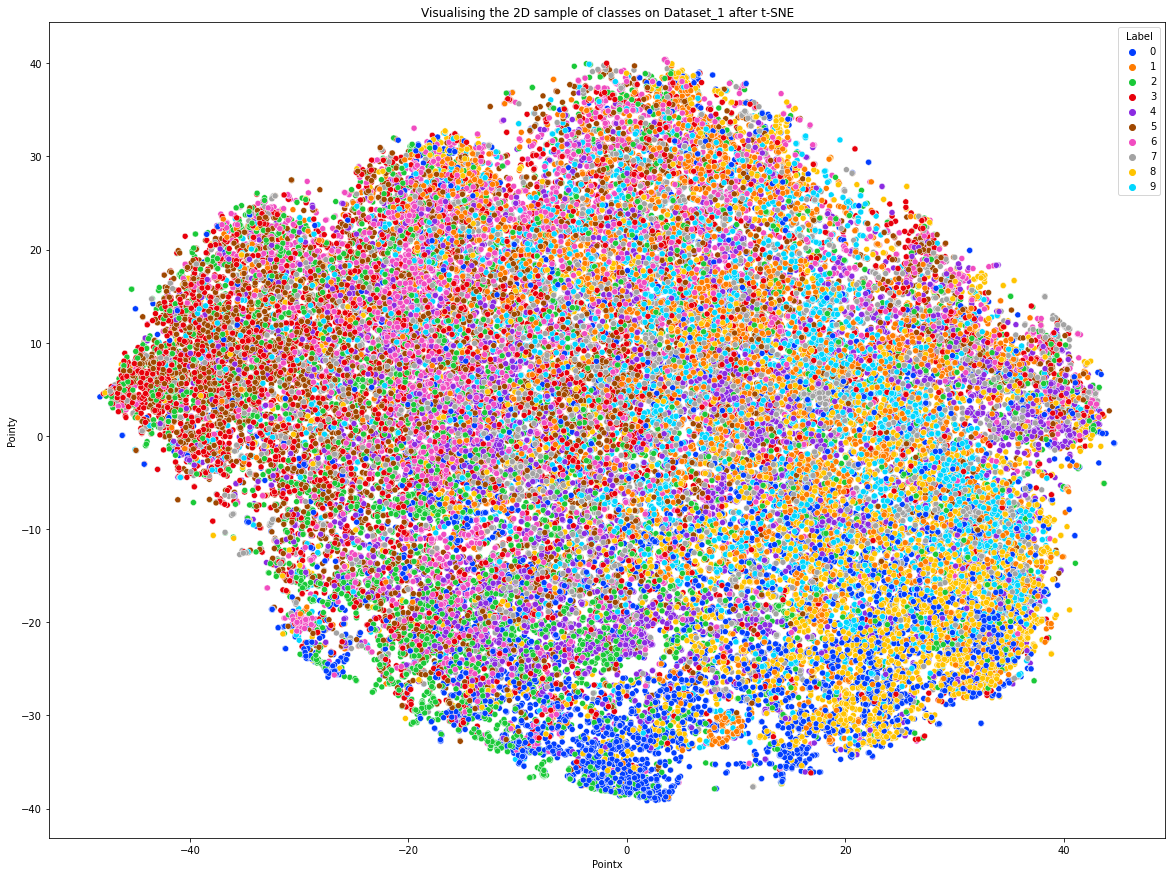

In [ ]:
def Question1b(Qhog):
  #Using t-SNE to reduce to 2 dimensions
  tsne_2d = TSNE(n_components = 2,random_state=0)
  X_2d = tsne_2d.fit_transform(Qhog.iloc[:,:-1])
  #Keeping the 2 points as there are 2 dimensions 
  pointx = X_2d[:,0]
  pointy = X_2d[:,1]
  #Storing the Label data
  label = Qhog['label']
  #Making a dataframe of the 2 points and labels
  dataframe_1c = pd.DataFrame(list(zip(pointx,pointy,label)), columns=["Pointx","Pointy","Label"])
  #Creating a figure of size 15*15
  plt.figure(figsize=(20,15))
  #Taking 10 colours for printing each class
  palette = sns.color_palette("bright", 10) 
  #Plotting the scatterplot for 2 Points using seaborn
  sns.scatterplot(data=dataframe_1c, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Pointx')
  plt.ylabel('Pointy')
  plt.title("Visualising the 2D sample of classes on Dataset_1 after t-SNE")
  plt.show()
  
Question1b(Qhog)

### **Question 1c**

In [ ]:
def Question1c(X_train,Y_train):
  #GridSearch CV for rbf kernel
  param_grid = {'C' : [0.1,1,10,100],
                'kernel' : ['rbf']}

  grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv = 5)
  grid.fit(X_train, Y_train) 
  # print best parameter after tuning 
  print(grid.best_params_) 
  # print how our model looks after hyper-parameter tuning 
  print(grid.best_estimator_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, kernel=rbf, score=0.424, total=26.0min
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.0min remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.427, total=26.3min
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 52.3min remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.433, total=26.0min
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.425, total=25.8min
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.426, total=25.5min
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.481, total=20.8min
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.485, total=20.6min
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.496, total=20.7min
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.482, total=20.5min
[CV] C=1, kernel=rbf .................................................
[CV] .

**Running on best parameters obtained**

In [ ]:
def run_bestparam(X_train,Y_train,X_test,Y_test):
  start = time.time()
  model = svm.SVC(kernel='rbf', C=10)
  model.fit(X_train, Y_train)
  joblib.dump(model, 'best_param_model.pkl')
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred))
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train,y_pred_train))
  end = time.time()
  print(f"Runtime of the program is {end - start}")

run_bestparam(X_train,Y_train,X_test,Y_test)

Accuracy between Y_test and pred_test  0.6442
Accuracy between Y_train and pred_train  0.99016
Runtime of the program is 3693.754253387451


### **Question 1d**

In [ ]:
model = joblib.load('/content/best_param_model.pkl')
sv = model.support_vectors_
index_sv = model.support_
print("Number of Support Vectors", len(index_sv))

Number of Support Vectors 45049


**Saving the Model**

In [ ]:
def Question1d(X_test,Y_test):
  model = joblib.load('/content/best_param_model.pkl')
  sv = model.support_vectors_
  index_sv = model.support_
  print("Number of Support Vectors", len(index_sv))
  data_sv = pd.DataFrame(columns = feat_cols1)
  print("The formed dataframe is ")
  for i in index_sv:
    l = data_cifar_pca.iloc[i,:]
    data_sv = data_sv.append(l, ignore_index= True)
  data_sv = data_sv.astype({"label":int})
  print(data_sv)
  X_train_sv = data_sv.iloc[:,:-1]
  Y_train_sv = data_sv.iloc[:,-1]
  print("The X_train and Y_train are")
  print(X_train_sv)
  print(Y_train_sv)
  model_sv = svm.SVC(kernel='rbf', C=10)
  model_sv.fit(X_train_sv, Y_train_sv)
  joblib.dump(model_sv, 'support_vector_model.pkl')
  y_pred_sv = model_sv.predict(X_test)
  y_pred_train_sv = model_sv.predict(X_train_sv)
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train_sv,y_pred_train_sv))
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred_sv))

Question1d(X_test,Y_test)

Number of Support Vectors 45049
Accuracy between Y_train and pred_train  0.98997
Accuracy between Y_test and pred_test  0.6415


**Loading the model**

In [ ]:
def Question1d_load(X_test,Y_test):
  model_sv = joblib.load('/content/support_vector_model.pkl')
  y_pred_sv = model_sv.predict(X_test)
  y_pred_train_sv = model_sv.predict(X_train_sv)
  print("Accuracy between Y_train and pred_train ",accuracy_score(Y_train_sv,y_pred_train_sv))
  print("Accuracy between Y_test and pred_test ",accuracy_score(Y_test,y_pred_sv))
